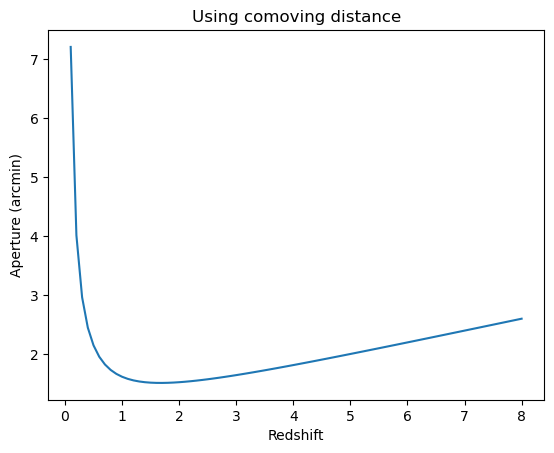

In [14]:
import simulation as sim
import simulation_tsz as sim2
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
from colossus.halo import mass_adv
from colossus.cosmology import cosmology
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM

z = np.linspace(0.1, 8, 80)
# z = 1
omega_m0, omega_b0, cosmo_h, sigma8, ns = sim.cosmo_para()
cosmo = FlatLambdaCDM(H0=cosmo_h*100, Om0=omega_m0)
Kpc_per_arcmin = cosmo.kpc_comoving_per_arcmin(z).value
pro = Kpc_per_arcmin / (1 + z)
M_to_arc = pro /1000
arc = 0.8/M_to_arc
# print(arc)
# print(sim.Mpc_to_arcmin(0.8, z) * (1 + z))
plt.title("Using comoving distance")
plt.xlabel("Redshift")
plt.ylabel("Aperture (arcmin)")
plt.plot(z, arc)

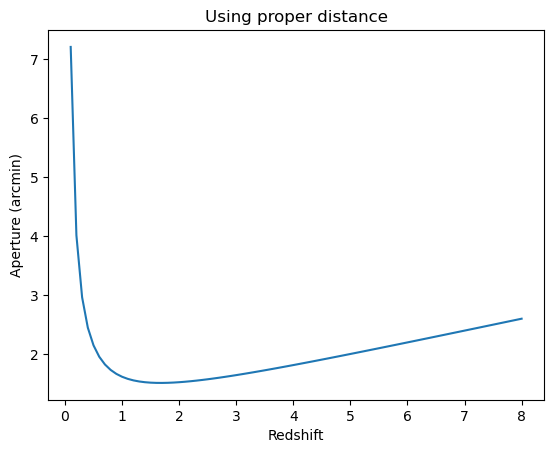

In [15]:
# Angular diameter distance in Mpc coresponding to an angle of arcmin 
pro = cosmo.kpc_proper_per_arcmin(z).value
M_to_arc = pro /1000

arc = 0.8/M_to_arc
plt.title("Using proper distance")
plt.xlabel("Redshift")
plt.ylabel("Aperture (arcmin)")
plt.plot(z, arc)

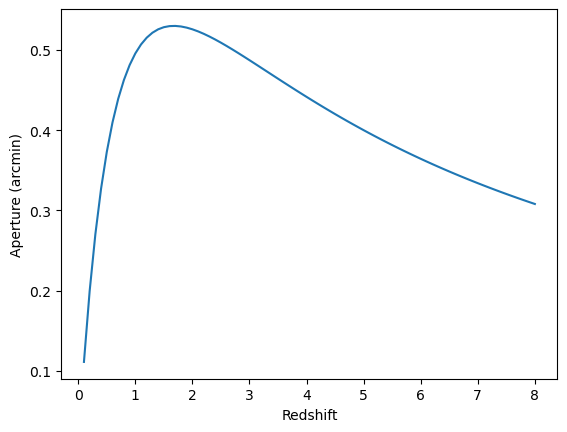

In [16]:
# Angular diameter distance in Mpc coresponding to an angle of arcmin 
pro = cosmo.kpc_proper_per_arcmin(z).value
M_to_arc = pro /1000
# plt.title("Using proper distance")
plt.xlabel("Redshift")
plt.ylabel("Aperture (arcmin)")
plt.plot(z, M_to_arc)

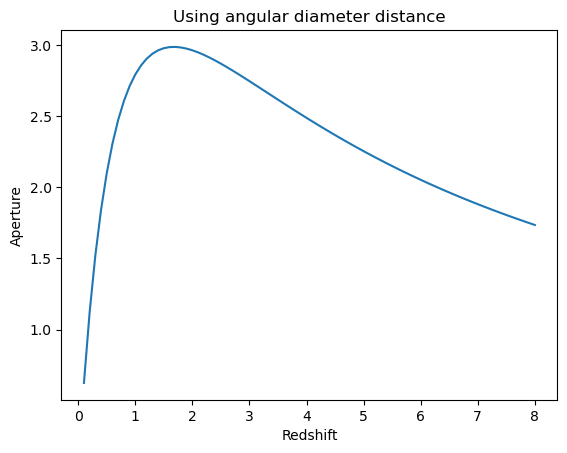

In [17]:
da = cosmo.angular_diameter_distance(z)
da05 = cosmo.angular_diameter_distance(0.5)
r = 2.1 * da / da05 
plt.title("Using angular diameter distance")
plt.xlabel("Redshift")
plt.ylabel("Aperture")
plt.plot(z, r)

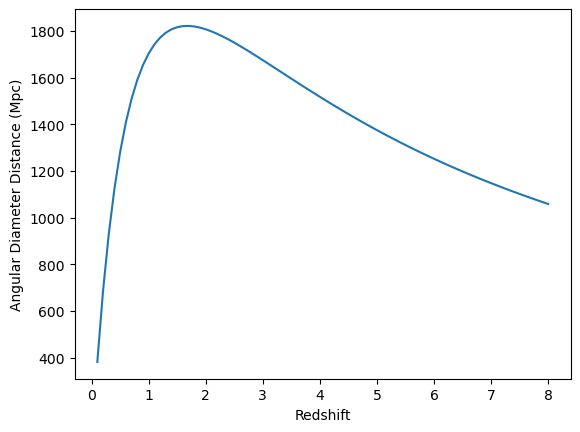

In [18]:
plt.xlabel("Redshift")
plt.ylabel("Angular Diameter Distance (Mpc)")
plt.plot(z,da)

In [19]:
# arc2 = r * M_to_arc
# plt.plot(z, arc2)

Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
Deleted outdated persistence file, no further action needed.
tSZ Signal: 1.6319723986269756e-05
tSZ Signal from option 4: 4.181590363469505e-06


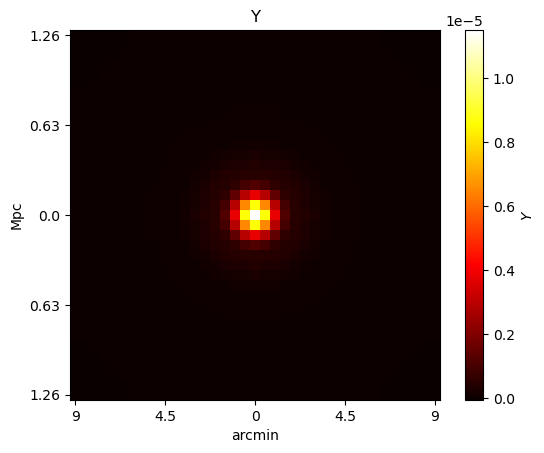

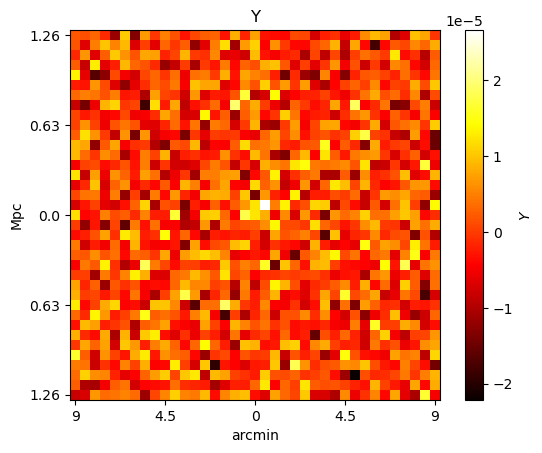

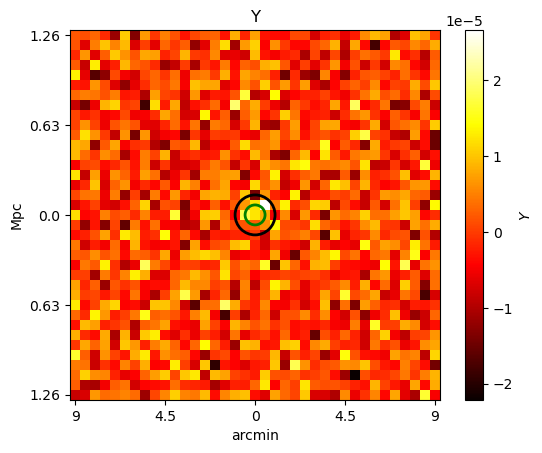

In [20]:
#Prepare directory to store simulated images
cwd = os.getcwd()
directory = 'test'
path = os.path.join(cwd, directory)
shutil.rmtree(path)
os.mkdir(path)

#Select options for images
# nums = np.arange(9) + 1
nums = [4,8,9]

#Input Mass and Redshift
Mass = [5]
z = [0.115]

#Select Telescope and Observation Frequency
tele = 'SPT'
f = 150

#Retrieve Observation-related Parameters
beam_size, noise_level = sim2.tele_para(tele, f)

#Converting to correct scale
f *= 1e9



for i in range(np.size(Mass)):
    
    Mass[i] *= 1e13
    radius = np.linspace(0.1, 9, 10)     #arcmin
    new_r = sim2.arcmin_to_Mpc(radius, z[i])
    battaglia_pro = np.array([sim2.battaglia_profile(r, Mass[i], z[i]) for r in new_r])
    y_pro = sim2.epp_to_y(battaglia_pro)
    
    abs_path = os.path.join(path, str(i))
    sim2.generate_img(radius, y_pro, f, noise_level, beam_size, z[i], nums, p = abs_path, AP = True, AP4 = True)
